# Домашнее задание. Свёрточные сети

Здесь вам предстоит построить и обучить свою первую свёрточную сеть для классификации изображений на данных CIFAR10.

In [130]:
import tensorflow as tf
from tqdm import tqdm_notebook

## Данные

CIFAR10
* 60000 RGB изображений размером 32x32x3
* 10 классов: самолёты, собаки, рыбы и т.п.

<img src="https://www.samyzaf.com/ML/cifar10/cifar1.jpg" style="width:40%">

In [190]:
import numpy as np
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=10**4, random_state=42)

class_names = np.array(['airplane','automobile ','bird ','cat ','deer ','dog ','frog ','horse ','ship ','truck'])

print (X_train.shape, y_train.shape)

(40000, 32, 32, 3) (40000, 1)


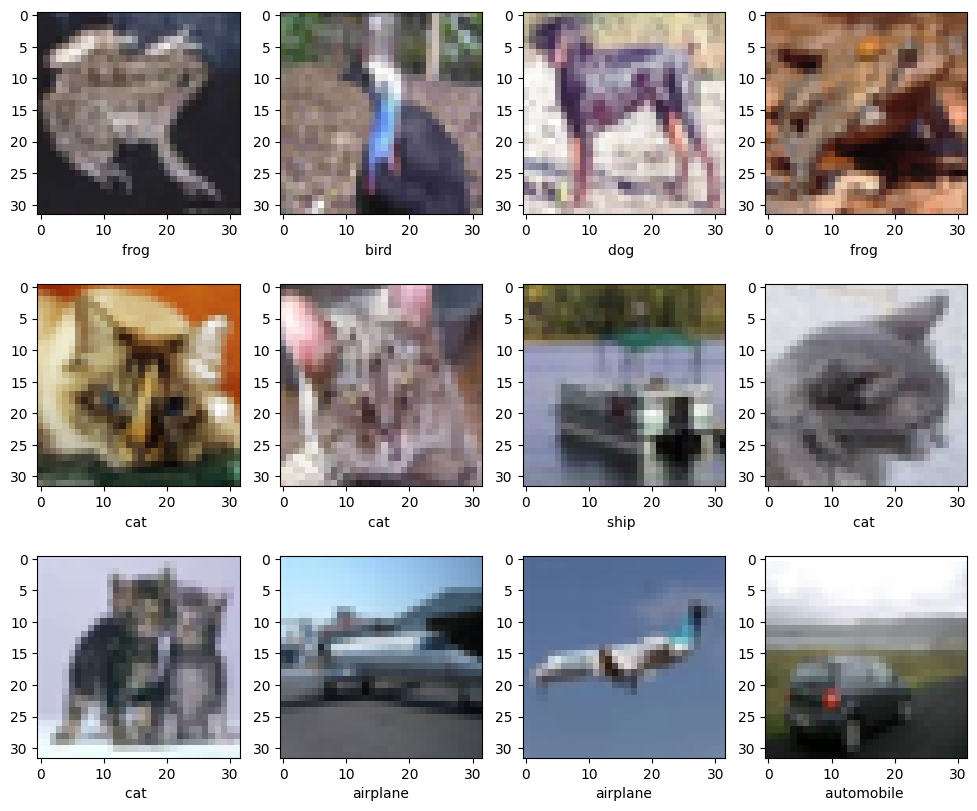

In [191]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=[12,10])
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.xlabel(class_names[y_train[i, 0]])
    plt.imshow(X_train[i])

## Подготовка данных

Сейчас каждый пиксель изображения закодирован тройкой чисел (RGB) __от 0 до 255__. Однако лучше себя показывает подход, где значения входов нейросети распределены недалеко от 0.

Давайте приведём все данные в диапазон __`[0, 1]`__ — просто разделим на соответствующий коэффициент:

In [192]:
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

Исполните код ниже для проверки, что все выполнено корректно.

In [193]:
assert np.shape(X_train) == (40000, 32, 32, 3), "data shape should not change"
assert 0.9 <= max(map(np.max, (X_train, X_val, X_test))) <= 1.05
assert 0.0 <= min(map(np.min, (X_train, X_val, X_test))) <= 0.1
assert len(np.unique(X_test / 255.)) > 10, "make sure you casted data to float type"

## Архитектура сети

Для начала реализуйте простую нейросеть:
1. принимает на вход картинки размера 32 x 32 x 3;
2. вытягивает их в вектор (`keras.layers.Flatten`);
3. пропускает через 1 или 2 полносвязных слоя;
4. выходной слой отдает вероятности принадлежности к каждому из 10 классов.

In [135]:
import keras
from keras import layers as L
from keras import backend as K

In [136]:
from keras.models import Sequential

model = Sequential()
model.add(L.Flatten(input_shape=(32, 32, 3)))
model.add(L.Dense(128, activation='relu'))
model.add(L.Dense(64, activation='relu'))
model.add(L.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_86"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_65 (Flatten)        (None, 3072)              0         
                                                                 
 dense_143 (Dense)           (None, 128)               393344    
                                                                 
 dense_144 (Dense)           (None, 64)                8256      
                                                                 
 dense_145 (Dense)           (None, 10)                650       
                                                                 
Total params: 402250 (1.53 MB)
Trainable params: 402250 (1.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [137]:
dummy_pred = model.predict(X_train[:20])
assert dummy_pred.shape == (20, 10)
assert np.allclose(dummy_pred.sum(-1), 1)
print("Успех!")

1/1 [==============================] - 0s 40ms/step
Успех!


### Устанавливаем `callbacks` для модели

In [138]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard

callbacks = [
    ModelCheckpoint(filepath='best_model.h5', save_best_only=True),  # Сохранение лучших весов
    EarlyStopping(patience=3, restore_best_weights=True),  # Остановка обучения, если метрика не улучшается
    TensorBoard(log_dir='./logs'),  # Визуализация метрик в TensorBoard
]

In [141]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), callbacks=callbacks)

Epoch 1/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.5747 - accuracy: 0.4379 - val_loss: 1.5869 - val_accuracy: 0.4258
Epoch 2/10
  42/1250 [>.............................] - ETA: 3s - loss: 1.5643 - accuracy: 0.4479

d:\avsip\code\ML\home_work_netology\.venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1250/1250 [==============================] - 3s 3ms/step - loss: 1.5561 - accuracy: 0.4439 - val_loss: 1.5539 - val_accuracy: 0.4465
Epoch 3/10
1250/1250 [==============================] - 3s 3ms/step - loss: 1.5395 - accuracy: 0.4484 - val_loss: 1.6098 - val_accuracy: 0.4233
Epoch 4/10
1250/1250 [==============================] - 3s 3ms/step - loss: 1.5233 - accuracy: 0.4574 - val_loss: 1.5333 - val_accuracy: 0.4478
Epoch 5/10
1250/1250 [==============================] - 3s 3ms/step - loss: 1.5113 - accuracy: 0.4603 - val_loss: 1.5582 - val_accuracy: 0.4393
Epoch 6/10
1250/1250 [==============================] - 3s 3ms/step - loss: 1.5021 - accuracy: 0.4633 - val_loss: 1.5401 - val_accuracy: 0.4418
Epoch 7/10
1250/1250 [==============================] - 3s 3ms/step - loss: 1.4881 - accuracy: 0.4702 - val_loss: 1.5344 - val_accuracy: 0.4448


### берем лучшие веса по результатам обучения

In [142]:
from sklearn.metrics import accuracy_score
from keras.models import load_model

best_model = load_model('best_model.h5')
predict_x = best_model.predict(X_test)
classes_x = np.argmax(predict_x, axis=1)
test_acc = accuracy_score(y_test, classes_x)
print("\nTest_acc =", test_acc)
assert test_acc > 0.45, "Not good enough. Back to the drawing board :)"
print("Not bad!")

313/313 [==============================] - 0s 797us/step

Test_acc = 0.4604
Not bad!


**Задание 1.2 (обязательно)** Реализуйте небольшую свёрточную сеть. Совсем небольшую:
1. Входной слой
2. Свёртка 3x3 с 10 фильтрами
3. Нелинейность на ваш вкус
4. Max-pooling 2x2
5. Вытягиваем оставшееся в вектор (Flatten)
6. Полносвязный слой на 100 нейронов
7. Нелинейность на ваш вкус
8. Выходной полносвязный слой с softmax

Обучите её так же, как и предыдущую сеть. Если всё хорошо, у вас получится accuracy не меньше __50%__.

In [143]:
model = Sequential()
model.add(L.InputLayer(input_shape=(32, 32, 3)))
model.add(L.Conv2D(10, (3, 3), activation='relu'))
model.add(L.MaxPooling2D((2, 2)))
model.add(L.Flatten())
model.add(L.Dense(100, activation='relu'))
model.add(L.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_87"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_256 (Conv2D)         (None, 30, 30, 10)        280       
                                                                 
 max_pooling2d_176 (MaxPool  (None, 15, 15, 10)        0         
 ing2D)                                                          
                                                                 
 flatten_66 (Flatten)        (None, 2250)              0         
                                                                 
 dense_146 (Dense)           (None, 100)               225100    
                                                                 
 dense_147 (Dense)           (None, 10)                1010      
                                                                 
Total params: 226390 (884.34 KB)
Trainable params: 226390 (884.34 KB)
Non-trainable params: 0 (0.00 Byte)
_____________

In [144]:
callbacks = [
    ModelCheckpoint(filepath='best_model_Conv2D.h5', save_best_only=True),
    EarlyStopping(patience=3, restore_best_weights=True),
    TensorBoard(log_dir='./logs'),
]

In [145]:
history_сonv2D = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), callbacks=callbacks)

Epoch 1/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5810 - accuracy: 0.4333 - val_loss: 1.4049 - val_accuracy: 0.4953
Epoch 2/10
  57/1250 [>.............................] - ETA: 3s - loss: 1.3205 - accuracy: 0.5258

d:\avsip\code\ML\home_work_netology\.venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1250/1250 [==============================] - 4s 3ms/step - loss: 1.3004 - accuracy: 0.5383 - val_loss: 1.3138 - val_accuracy: 0.5352
Epoch 3/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.1887 - accuracy: 0.5800 - val_loss: 1.2601 - val_accuracy: 0.5624
Epoch 4/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.1088 - accuracy: 0.6105 - val_loss: 1.1833 - val_accuracy: 0.5883
Epoch 5/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.0446 - accuracy: 0.6338 - val_loss: 1.1924 - val_accuracy: 0.5801
Epoch 6/10
1250/1250 [==============================] - 4s 3ms/step - loss: 0.9851 - accuracy: 0.6560 - val_loss: 1.1444 - val_accuracy: 0.6033
Epoch 7/10
1250/1250 [==============================] - 4s 3ms/step - loss: 0.9280 - accuracy: 0.6748 - val_loss: 1.1436 - val_accuracy: 0.6026
Epoch 8/10
1250/1250 [==============================] - 4s 3ms/step - loss: 0.8853 - accuracy: 0.6877 - val_loss: 1.1128 - val_accuracy: 0.6184
Epo

In [146]:
from sklearn.metrics import accuracy_score
from keras.models import load_model

best_model = load_model('best_model_Conv2D.h5')
predict_x = best_model.predict(X_test)
classes_x = np.argmax(predict_x, axis=1)
test_acc = accuracy_score(y_test, classes_x)
print("\nTest_acc =", test_acc)
assert test_acc > 0.50, "Not good enough. Back to the drawing board :)"
print("Not bad!")

313/313 [==============================] - 0s 1ms/step

Test_acc = 0.6118
Not bad!


## Учимся учить

In [147]:
import tqdm

class Evaluator(list):

    def __init__(self, models, optimizers='adam', loss=keras.losses.sparse_categorical_crossentropy,
                 metrics=[keras.metrics.sparse_categorical_accuracy]):
        '''
            models: dict {name: model}
            optimizers: list of optimizers or just one optimizer
        '''
        if not isinstance(models, dict):
            models = {'single_model': models}
        if not isinstance(optimizers, dict):
            optimizers = {str(optimizers.__class__): optimizers}
        super().__init__([(model_name, keras.models.clone_model(model), optimizer_name, optimizer)
                          for model_name, model in models.items()
                          for optimizer_name, optimizer in optimizers.items()])
        for _, model, _, optimizer in self:
            model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

    def fit(self, X, y, validation_data=(), max_epochs=100, verbose=0, callbacks=[], batch_size=32):
        if not isinstance(callbacks, list):
            callbacks = [callbacks]
        for model_name, model, optimizer_name, optimizer in tqdm.notebook.tqdm(self):
            model.fit(X, y, validation_data=validation_data or None, epochs=max_epochs, verbose=verbose,
                      batch_size=batch_size, callbacks=callbacks + [keras.callbacks.TensorBoard(
                          log_dir='./logs/{}_{}'.format(model_name, optimizer_name))])

    def fit_generator(self, X, y, validation_data=(), max_epochs=100, verbose=1, callbacks=[], batch_size=32):
        datagen = keras.preprocessing.image.ImageDataGenerator(
            rotation_range=20,
            width_shift_range=0.2,
            height_shift_range=0.2,
            horizontal_flip=True
        )
        if not isinstance(callbacks, list):
            callbacks = [callbacks]
        for model_name, model, optimizer_name, optimizer in tqdm.notebook.tqdm(self):
            model.fit_generator(datagen.flow(X, y, batch_size=batch_size), epochs=max_epochs,
                validation_data=validation_data or None, verbose=verbose,
                callbacks=callbacks + [keras.callbacks.TensorBoard(
                    log_dir='./logs/{}_{}'.format(model_name, optimizer_name))])
            
    def evaluate(self, X, y, metric):
        for model_name, model, optimizer_name, _ in self:
            y_pred = np.argmax(model.predict(X), axis=1)
            print('Final score of {}_{} is {}'.format(model_name, optimizer_name, metric(y, y_pred)))

In [148]:
from keras import optimizers

def create_conv_model():
    model = Sequential()
    model.add(L.InputLayer(input_shape=(32, 32, 3)))
    model.add(L.Conv2D(10, (3, 3), activation='relu'))
    model.add(L.MaxPooling2D((2, 2)))
    model.add(L.Flatten())
    model.add(L.Dense(100, activation='relu'))
    model.add(L.Dense(10, activation='softmax'))
    return model

# Создаем экземпляр класса Evaluator
model = create_conv_model()
optimizers = {'SGD': optimizers.SGD(),
              'Adam': optimizers.Adam()}

In [149]:
evaluator = Evaluator(model, optimizers=optimizers)
evaluator.fit(X_train, y_train, validation_data=(X_val, y_val))
evaluator.evaluate(X_test, y_test, accuracy_score)

  0%|          | 0/2 [00:00<?, ?it/s]

313/313 [==============================] - 0s 1ms/step
Final score of single_model_SGD is 0.5657
313/313 [==============================] - 0s 1ms/step
Final score of single_model_Adam is 0.565


Задание 1.4 (опционально) Добавьте нормализацию по батчу (BatchNormalization) между свёрткой и активацией. Попробуйте использовать несколько нормализаций — в свёрточных и полносвязных слоях.

Для удобства реализуем класс Models, который по сути будет являться списком моделей с двумя методами: add (добавить слой ко всем моделям) и add_create (создать новую модель на основе базовой с дополнительным слоем). Пользоваться им необязательно, но вдруг :)

In [194]:
from collections import OrderedDict
from keras.models import Sequential
from keras.layers import InputLayer

class Models(OrderedDict):
    def __init__(self, models):
        if not isinstance(models, dict):
            models = OrderedDict({'base_model': models})
        super().__init__(models)

    def add(self, layer):
        for name, model in self.items():
            model.add(layer)

    def add_create(self, name, layer):
        base_model = next(iter(self.items()))[1]
        new_model = keras.models.clone_model(base_model)
        new_model.add(layer)
        self.update({name: new_model})

    def add_update(self, name, layer):
        base_model = self[next(reversed(self))]
        new_model = keras.models.clone_model(base_model)
        new_model.add(layer)
        self.update({name: new_model})

    def compile_models(self, optimizer, loss, metrics):
        for model in self.values():
            model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

models = Models(Sequential())
models.add(InputLayer(input_shape=(32, 32, 3)))
models.add(L.Conv2D(10, (3, 3), activation='relu'))
models.add(L.MaxPooling2D((2, 2)))
model.add(L.BatchNormalization())
models.add(L.Flatten())
models.add(L.Dense(100, activation='relu'))
models.add(L.Dense(10, activation='softmax'))
models.compile_models(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [195]:
callbacks = [
    ModelCheckpoint(filepath='best_model_Conv2D_class.h5', save_best_only=True),
    EarlyStopping(patience=3, restore_best_weights=True),
    TensorBoard(log_dir='./logs'),
]

for model_name, model in models.items():
    model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), callbacks=callbacks)

Epoch 1/10
1250/1250 [==============================] - 5s 3ms/step - loss: 1.6421 - accuracy: 0.4139 - val_loss: 1.5033 - val_accuracy: 0.4619
Epoch 2/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.3727 - accuracy: 0.5141 - val_loss: 1.3696 - val_accuracy: 0.5126
Epoch 3/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.2799 - accuracy: 0.5454 - val_loss: 1.2831 - val_accuracy: 0.5474
Epoch 4/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.2111 - accuracy: 0.5708 - val_loss: 1.2708 - val_accuracy: 0.5565
Epoch 5/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.1616 - accuracy: 0.5897 - val_loss: 1.2461 - val_accuracy: 0.5631
Epoch 6/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.1211 - accuracy: 0.6039 - val_loss: 1.2008 - val_accuracy: 0.5772
Epoch 7/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.0852 - accuracy: 0.6169 - val_loss: 1.2647 - val_accuracy:

In [196]:
from sklearn.metrics import accuracy_score
from keras.models import load_model

best_model = load_model('best_model_Conv2D_class.h5')
predict_x = best_model.predict(X_test)
classes_x = np.argmax(predict_x, axis=1)
test_acc = accuracy_score(y_test, classes_x)
print("\nTest_acc =", test_acc)
assert test_acc > 0.50, "Not good enough. Back to the drawing board :)"
print("Not bad!")

313/313 [==============================] - 0s 1ms/step

Test_acc = 0.5862
Not bad!


### Достижения `80` процентов качества

In [60]:
models = Models(Sequential())

models.add(InputLayer(input_shape=(32, 32, 3)))
models.add(L.Conv2D(32, kernel_size=(3, 3), activation='relu'))
models.add(L.Conv2D(64, kernel_size=(3, 3), activation='relu'))
models.add(L.MaxPooling2D(pool_size=(2, 2)))
models.add(L.Dropout(0.10))
models.add(L.Flatten())
models.add(L.Dense(128, activation='relu'))
models.add(L.Dropout(0.05))
models.add(L.Dense(10, activation='softmax'))

models.compile_models(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

callbacks = [
    ModelCheckpoint(filepath='best_model_more_80.h5', save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True),
    TensorBoard(log_dir='./logs')
]

models['base_model'].fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, callbacks=callbacks)

test_predictions = models['base_model'].predict(X_test)
test_labels = np.argmax(test_predictions, axis=1)

test_accuracy = accuracy_score(y_test, test_labels)
print(f'Test Accuracy: {test_accuracy}')

Epoch 1/10
1250/1250 [==============================] - 30s 23ms/step - loss: 1.4127 - accuracy: 0.4920 - val_loss: 1.1132 - val_accuracy: 0.6091
Epoch 2/10
   4/1250 [..............................] - ETA: 29s - loss: 1.1118 - accuracy: 0.6094

d:\avsip\code\ML\home_work_netology\.venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1250/1250 [==============================] - 29s 23ms/step - loss: 1.0202 - accuracy: 0.6410 - val_loss: 0.9835 - val_accuracy: 0.6571
Epoch 3/10
1250/1250 [==============================] - 30s 24ms/step - loss: 0.8463 - accuracy: 0.7011 - val_loss: 0.9767 - val_accuracy: 0.6571
Epoch 4/10
1250/1250 [==============================] - 29s 23ms/step - loss: 0.7136 - accuracy: 0.7495 - val_loss: 0.9447 - val_accuracy: 0.6858
Epoch 5/10
1250/1250 [==============================] - 27s 22ms/step - loss: 0.5878 - accuracy: 0.7915 - val_loss: 0.9713 - val_accuracy: 0.6813
Epoch 6/10
1250/1250 [==============================] - 27s 22ms/step - loss: 0.4765 - accuracy: 0.8310 - val_loss: 1.0839 - val_accuracy: 0.6717
Epoch 7/10
1250/1250 [==============================] - 28s 22ms/step - loss: 0.3783 - accuracy: 0.8669 - val_loss: 1.1624 - val_accuracy: 0.6798
Epoch 8/10
1250/1250 [==============================] - 28s 22ms/step - loss: 0.3053 - accuracy: 0.8927 - val_loss: 1.2356 - val_accura

в модели дроп аут `0,1` и `0,05`, при этом кол. эпох обучения `Test Accuracy`: `0.6839`

In [61]:
from keras.optimizers import Adam

custom_optimizer = Adam(learning_rate=0.003)  

models = Models(Sequential())

models.add(InputLayer(input_shape=(32, 32, 3)))
models.add(L.Conv2D(32, kernel_size=(3, 3), activation='relu'))
models.add(L.Conv2D(64, kernel_size=(3, 3), activation='relu'))
models.add(L.MaxPooling2D(pool_size=(2, 2)))
models.add(L.Dropout(0.10))
models.add(L.Flatten())
models.add(L.Dense(128, activation='relu'))
models.add(L.Dropout(0.05))
models.add(L.Dense(10, activation='softmax'))

models.compile_models(optimizer=custom_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
models['base_model'].fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, callbacks=callbacks)
test_predictions = models['base_model'].predict(X_test)
test_labels = np.argmax(test_predictions, axis=1)

test_accuracy = accuracy_score(y_test, test_labels)
print(f'Test Accuracy: {test_accuracy}')

Epoch 1/10
1250/1250 [==============================] - 30s 24ms/step - loss: 1.5926 - accuracy: 0.4241 - val_loss: 1.3471 - val_accuracy: 0.5115
Epoch 2/10
   3/1250 [..............................] - ETA: 31s - loss: 1.1973 - accuracy: 0.5729

d:\avsip\code\ML\home_work_netology\.venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1250/1250 [==============================] - 28s 23ms/step - loss: 1.2532 - accuracy: 0.5493 - val_loss: 1.1794 - val_accuracy: 0.5788
Epoch 3/10
1250/1250 [==============================] - 28s 22ms/step - loss: 1.1084 - accuracy: 0.6068 - val_loss: 1.1151 - val_accuracy: 0.6068
Epoch 4/10
1250/1250 [==============================] - 28s 22ms/step - loss: 1.0027 - accuracy: 0.6491 - val_loss: 1.1052 - val_accuracy: 0.6117
Epoch 5/10
1250/1250 [==============================] - 29s 23ms/step - loss: 0.9200 - accuracy: 0.6728 - val_loss: 1.1896 - val_accuracy: 0.5977
Epoch 6/10
1250/1250 [==============================] - 28s 22ms/step - loss: 0.8607 - accuracy: 0.6932 - val_loss: 1.1522 - val_accuracy: 0.6116
Epoch 7/10
1250/1250 [==============================] - 28s 22ms/step - loss: 0.7972 - accuracy: 0.7171 - val_loss: 1.2006 - val_accuracy: 0.6082
Epoch 8/10
1250/1250 [==============================] - 28s 22ms/step - loss: 0.7540 - accuracy: 0.7323 - val_loss: 1.1715 - val_accura

в модели выше не установлен явно ленинг рейт `0.003`, `Test Accuracy`: `0.6166`

In [62]:
from keras.optimizers import Adam

custom_optimizer = Adam(learning_rate=0.001)  
models = Models(Sequential())

models.add(InputLayer(input_shape=(32, 32, 3)))
models.add(L.Conv2D(32, kernel_size=(3, 3), activation='relu'))
models.add(L.Conv2D(64, kernel_size=(3, 3), activation='relu'))
models.add(L.MaxPooling2D(pool_size=(2, 2)))
models.add(L.Dropout(0.20))
models.add(L.Flatten())
models.add(L.Dense(128, activation='relu'))
models.add(L.Dropout(0.05))
models.add(L.Dense(10, activation='softmax'))

models.compile_models(optimizer=custom_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Обучим модель
models['base_model'].fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32, callbacks=callbacks)

test_predictions = models['base_model'].predict(X_test)
test_labels = np.argmax(test_predictions, axis=1)

test_accuracy = accuracy_score(y_test, test_labels)
print(f'Test Accuracy: {test_accuracy}')

Epoch 1/20
1250/1250 [==============================] - 30s 23ms/step - loss: 1.4108 - accuracy: 0.4893 - val_loss: 1.1291 - val_accuracy: 0.6057
Epoch 2/20
1250/1250 [==============================] - 29s 23ms/step - loss: 1.0501 - accuracy: 0.6281 - val_loss: 0.9874 - val_accuracy: 0.6543
Epoch 3/20
   7/1250 [..............................] - ETA: 27s - loss: 0.8595 - accuracy: 0.7143

d:\avsip\code\ML\home_work_netology\.venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1250/1250 [==============================] - 29s 23ms/step - loss: 0.9001 - accuracy: 0.6833 - val_loss: 0.9422 - val_accuracy: 0.6700
Epoch 4/20
1250/1250 [==============================] - 29s 23ms/step - loss: 0.7787 - accuracy: 0.7272 - val_loss: 0.9412 - val_accuracy: 0.6714
Epoch 5/20
1250/1250 [==============================] - 28s 23ms/step - loss: 0.6818 - accuracy: 0.7602 - val_loss: 0.9599 - val_accuracy: 0.6790
Epoch 6/20
1250/1250 [==============================] - 28s 22ms/step - loss: 0.5862 - accuracy: 0.7918 - val_loss: 0.9725 - val_accuracy: 0.6764
Epoch 7/20
1250/1250 [==============================] - 28s 22ms/step - loss: 0.5026 - accuracy: 0.8216 - val_loss: 1.0414 - val_accuracy: 0.6666
Epoch 8/20
1250/1250 [==============================] - 28s 22ms/step - loss: 0.4332 - accuracy: 0.8467 - val_loss: 1.0984 - val_accuracy: 0.6760
Epoch 9/20
313/313 [==============================] - 2s 5ms/step
Test Accuracy: 0.6727


In [70]:
from keras.optimizers import Adam

custom_optimizer = Adam(learning_rate=0.001)  
models = Models(Sequential())

models.add(InputLayer(input_shape=(32, 32, 3)))
models.add(L.Conv2D(32, kernel_size=(3, 3), activation='relu'))
models.add(L.Conv2D(64, kernel_size=(3, 3), activation='relu'))
models.add(L.MaxPooling2D(pool_size=(2, 2)))
models.add(L.Dropout(0.50))
models.add(L.Flatten())
models.add(L.Dense(128, activation='relu'))
models.add(L.Dropout(0.25))
models.add(L.Dense(10, activation='softmax'))

models.compile_models(optimizer=custom_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
models['base_model'].fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32, callbacks=callbacks)

test_predictions = models['base_model'].predict(X_test)
test_labels = np.argmax(test_predictions, axis=1)

test_accuracy = accuracy_score(y_test, test_labels)
print(f'Test Accuracy: {test_accuracy}')

Epoch 1/20
1250/1250 [==============================] - 30s 23ms/step - loss: 1.4866 - accuracy: 0.4649 - val_loss: 1.1320 - val_accuracy: 0.6037
Epoch 2/20
1250/1250 [==============================] - 29s 23ms/step - loss: 1.1590 - accuracy: 0.5894 - val_loss: 1.0060 - val_accuracy: 0.6433
Epoch 3/20
1250/1250 [==============================] - 30s 24ms/step - loss: 1.0221 - accuracy: 0.6386 - val_loss: 0.9834 - val_accuracy: 0.6524
Epoch 4/20
1250/1250 [==============================] - 30s 24ms/step - loss: 0.9419 - accuracy: 0.6656 - val_loss: 0.9569 - val_accuracy: 0.6605
Epoch 5/20
1250/1250 [==============================] - 30s 24ms/step - loss: 0.8741 - accuracy: 0.6898 - val_loss: 0.8926 - val_accuracy: 0.6920
Epoch 6/20
   4/1250 [..............................] - ETA: 28s - loss: 1.0365 - accuracy: 0.6172

d:\avsip\code\ML\home_work_netology\.venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1250/1250 [==============================] - 30s 24ms/step - loss: 0.8147 - accuracy: 0.7100 - val_loss: 0.8950 - val_accuracy: 0.6911
Epoch 7/20
1250/1250 [==============================] - 29s 23ms/step - loss: 0.7637 - accuracy: 0.7233 - val_loss: 0.8806 - val_accuracy: 0.6956
Epoch 8/20
1250/1250 [==============================] - 29s 23ms/step - loss: 0.7172 - accuracy: 0.7405 - val_loss: 0.8626 - val_accuracy: 0.7024
Epoch 9/20
1250/1250 [==============================] - 28s 22ms/step - loss: 0.6754 - accuracy: 0.7569 - val_loss: 0.9046 - val_accuracy: 0.6884
Epoch 10/20
1250/1250 [==============================] - 30s 24ms/step - loss: 0.6382 - accuracy: 0.7681 - val_loss: 0.8658 - val_accuracy: 0.7087
Epoch 11/20
1250/1250 [==============================] - 29s 23ms/step - loss: 0.6117 - accuracy: 0.7805 - val_loss: 0.9103 - val_accuracy: 0.7010
Epoch 12/20
1250/1250 [==============================] - 28s 22ms/step - loss: 0.5850 - accuracy: 0.7888 - val_loss: 0.9305 - val_acc

In [71]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from sklearn.metrics import accuracy_score

models = Models(Sequential())

models.add(InputLayer(input_shape=(32, 32, 3)))
models.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
models.add(MaxPooling2D(pool_size=(2, 2)))
models.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
models.add(MaxPooling2D(pool_size=(2, 2)))
models.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
models.add(MaxPooling2D(pool_size=(2, 2)))
models.add(Dropout(0.25))
models.add(Flatten())
models.add(Dense(512, activation='relu'))
models.add(Dropout(0.5))
models.add(Dense(10, activation='softmax'))

models.compile_models(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

callbacks = [
    ModelCheckpoint(filepath='best_model_high_complexity.h5', save_best_only=True),
    EarlyStopping(patience=10, restore_best_weights=True),
    TensorBoard(log_dir='./logs')
]

models['base_model'].fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=64, callbacks=callbacks)

test_predictions = models['base_model'].predict(X_test)
test_labels = np.argmax(test_predictions, axis=1)

test_accuracy = accuracy_score(y_test, test_labels)
print(f'Test Accuracy: {test_accuracy}')

Epoch 1/50
625/625 [==============================] - 21s 32ms/step - loss: 1.6489 - accuracy: 0.3871 - val_loss: 1.2939 - val_accuracy: 0.5248
Epoch 2/50
  3/625 [..............................] - ETA: 18s - loss: 1.3222 - accuracy: 0.5260

d:\avsip\code\ML\home_work_netology\.venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


625/625 [==============================] - 20s 32ms/step - loss: 1.2543 - accuracy: 0.5501 - val_loss: 1.0739 - val_accuracy: 0.6234
Epoch 3/50
625/625 [==============================] - 20s 31ms/step - loss: 1.0978 - accuracy: 0.6130 - val_loss: 0.9985 - val_accuracy: 0.6463
Epoch 4/50
625/625 [==============================] - 20s 31ms/step - loss: 0.9635 - accuracy: 0.6607 - val_loss: 0.8872 - val_accuracy: 0.6919
Epoch 5/50
625/625 [==============================] - 20s 32ms/step - loss: 0.8796 - accuracy: 0.6916 - val_loss: 0.8615 - val_accuracy: 0.6980
Epoch 6/50
625/625 [==============================] - 20s 31ms/step - loss: 0.8126 - accuracy: 0.7124 - val_loss: 0.7930 - val_accuracy: 0.7224
Epoch 7/50
625/625 [==============================] - 20s 32ms/step - loss: 0.7569 - accuracy: 0.7318 - val_loss: 0.8010 - val_accuracy: 0.7231
Epoch 8/50
625/625 [==============================] - 20s 32ms/step - loss: 0.7146 - accuracy: 0.7489 - val_loss: 0.7951 - val_accuracy: 0.7252
Epo

In [97]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from sklearn.metrics import accuracy_score

models = Models(Sequential())

models.add(InputLayer(input_shape=(32, 32, 3)))
models.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
models.add(MaxPooling2D(pool_size=(2, 2)))
models.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
models.add(MaxPooling2D(pool_size=(2, 2)))
models.add(Dropout(0.10))
models.add(Flatten())
models.add(Dense(256, activation='relu'))
models.add(Dropout(0.10))
models.add(Dense(256, activation='relu'))
models.add(Dropout(0.10))
models.add(Dense(10, activation='softmax'))

models.compile_models(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
callbacks = [
    ModelCheckpoint(filepath='best_model_high_complexity.h5', save_best_only=True),
    EarlyStopping(patience=10, restore_best_weights=True),
    TensorBoard(log_dir='./logs')
]

models['base_model'].fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, callbacks=callbacks)
test_predictions = models['base_model'].predict(X_test)
test_labels = np.argmax(test_predictions, axis=1)

test_accuracy = accuracy_score(y_test, test_labels)
print(f'Test Accuracy: {test_accuracy}')

Epoch 1/50
1250/1250 [==============================] - 23s 18ms/step - loss: 1.4934 - accuracy: 0.4544 - val_loss: 1.1674 - val_accuracy: 0.5865
Epoch 2/50
   7/1250 [..............................] - ETA: 21s - loss: 1.2679 - accuracy: 0.5268

d:\avsip\code\ML\home_work_netology\.venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1250/1250 [==============================] - 22s 18ms/step - loss: 1.1206 - accuracy: 0.6036 - val_loss: 1.0325 - val_accuracy: 0.6374
Epoch 3/50
1250/1250 [==============================] - 22s 18ms/step - loss: 0.9655 - accuracy: 0.6609 - val_loss: 0.9606 - val_accuracy: 0.6650
Epoch 4/50
1250/1250 [==============================] - 22s 18ms/step - loss: 0.8536 - accuracy: 0.6989 - val_loss: 0.9410 - val_accuracy: 0.6760
Epoch 5/50
1250/1250 [==============================] - 22s 18ms/step - loss: 0.7555 - accuracy: 0.7319 - val_loss: 0.8667 - val_accuracy: 0.7020
Epoch 6/50
1250/1250 [==============================] - 22s 18ms/step - loss: 0.6695 - accuracy: 0.7628 - val_loss: 0.8977 - val_accuracy: 0.6934
Epoch 7/50
1250/1250 [==============================] - 22s 18ms/step - loss: 0.5919 - accuracy: 0.7885 - val_loss: 0.8431 - val_accuracy: 0.7194
Epoch 8/50
1250/1250 [==============================] - 22s 18ms/step - loss: 0.5312 - accuracy: 0.8127 - val_loss: 0.8791 - val_accura

In [179]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import SGD
from keras.utils import to_categorical
import numpy as np

callbacks = [
    ModelCheckpoint(filepath='best_model_high_complexity.h5', save_best_only=True),
    EarlyStopping(patience=10, restore_best_weights=True),
    TensorBoard(log_dir='./logs'),
]

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=10**4, random_state=42)

X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val), callbacks=callbacks)
_, acc = model.evaluate(X_test, y_test)
print('> %.3f' % (acc * 100.0))

Epoch 1/100
625/625 [==============================] - 29s 46ms/step - loss: 1.8801 - accuracy: 0.2946 - val_loss: 1.5510 - val_accuracy: 0.4306
Epoch 2/100
  3/625 [..............................] - ETA: 27s - loss: 1.6034 - accuracy: 0.4115

d:\avsip\code\ML\home_work_netology\.venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


625/625 [==============================] - 29s 46ms/step - loss: 1.4806 - accuracy: 0.4575 - val_loss: 1.2758 - val_accuracy: 0.5373
Epoch 3/100
625/625 [==============================] - 28s 46ms/step - loss: 1.2944 - accuracy: 0.5335 - val_loss: 1.1619 - val_accuracy: 0.5798
Epoch 4/100
625/625 [==============================] - 28s 45ms/step - loss: 1.1531 - accuracy: 0.5878 - val_loss: 1.0033 - val_accuracy: 0.6375
Epoch 5/100
625/625 [==============================] - 28s 46ms/step - loss: 1.0406 - accuracy: 0.6309 - val_loss: 0.9262 - val_accuracy: 0.6661
Epoch 6/100
625/625 [==============================] - 28s 45ms/step - loss: 0.9510 - accuracy: 0.6636 - val_loss: 0.8909 - val_accuracy: 0.6863
Epoch 7/100
625/625 [==============================] - 28s 45ms/step - loss: 0.8781 - accuracy: 0.6937 - val_loss: 0.7938 - val_accuracy: 0.7198
Epoch 8/100
625/625 [==============================] - 28s 45ms/step - loss: 0.8185 - accuracy: 0.7131 - val_loss: 0.8171 - val_accuracy: 0.70

313/313 [==============================] - 2s 8ms/step

 Test_acc = 0.8074
Это победа!
313/313 [==============================] - 2s 8ms/step


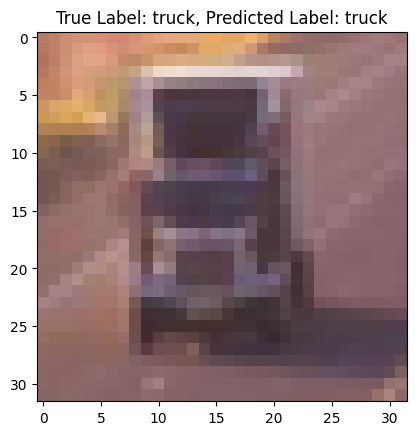

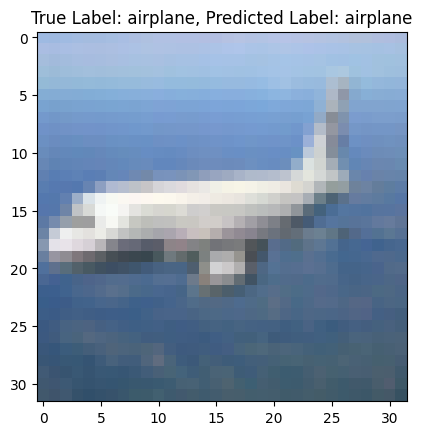

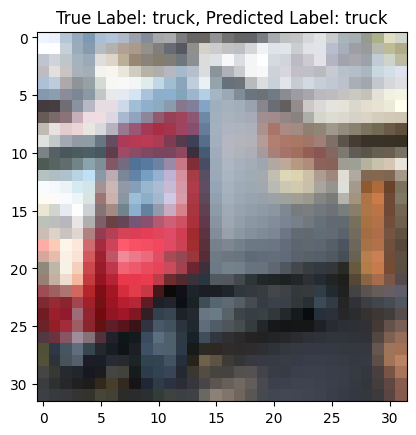

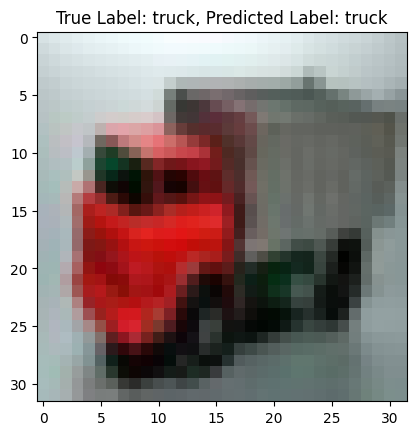

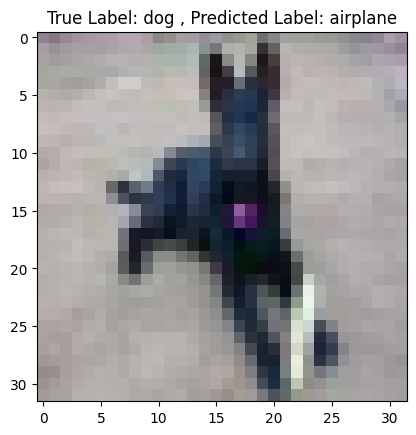

In [180]:
from sklearn.metrics import accuracy_score

predict_x=model.predict(X_test)
classes_x=np.argmax(predict_x,axis=1)

test_acc = accuracy_score(y_test, to_categorical(classes_x))
print("\n Test_acc =", test_acc)
if test_acc > 0.8:
    print("Это победа!")

import numpy as np
import matplotlib.pyplot as plt

predictions = model.predict(X_test)
random_indexes = np.random.choice(range(len(X_test)), size=5, replace=False)

# print(random_indexes)
for i in random_indexes:
    plt.imshow(X_test[i])
    plt.title(f"True Label: {class_names[np.argmax(y_test[i])]}, Predicted Label: {class_names[np.argmax(predictions[i])]}")
    plt.show()

In [181]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import SGD
from keras.utils import to_categorical
import numpy as np
from keras.callbacks import LearningRateScheduler

# Определение функции, которая будет возвращать новое значение learning rate
def schedule(epoch, learning_rate):
    if epoch < 10:
        return learning_rate  # оставить первые 10 эпох с тем же learning rate
    else:
        return learning_rate * 0.1  # уменьшить learning rate в 10 раз после 10 эпох

callbacks = [
    ModelCheckpoint(filepath='best_model_high_complexity.h5', save_best_only=True),
    EarlyStopping(patience=10, restore_best_weights=True),
    TensorBoard(log_dir='./logs'),
    LearningRateScheduler(schedule, verbose=1)
]

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=10**4, random_state=42)

X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val), callbacks=callbacks)
_, acc = model.evaluate(X_test, y_test)
print('> %.3f' % (acc * 100.0))


Epoch 1: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 1/100
625/625 [==============================] - 29s 45ms/step - loss: 1.9660 - accuracy: 0.2598 - val_loss: 1.5987 - val_accuracy: 0.4101 - lr: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 2/100
  3/625 [..............................] - ETA: 25s - loss: 1.8004 - accuracy: 0.3542

d:\avsip\code\ML\home_work_netology\.venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


625/625 [==============================] - 28s 45ms/step - loss: 1.5707 - accuracy: 0.4185 - val_loss: 1.4873 - val_accuracy: 0.4566 - lr: 0.0100

Epoch 3: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 3/100
625/625 [==============================] - 27s 44ms/step - loss: 1.3785 - accuracy: 0.4967 - val_loss: 1.2624 - val_accuracy: 0.5502 - lr: 0.0100

Epoch 4: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 4/100
625/625 [==============================] - 29s 46ms/step - loss: 1.2286 - accuracy: 0.5579 - val_loss: 1.0384 - val_accuracy: 0.6260 - lr: 0.0100

Epoch 5: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 5/100
625/625 [==============================] - 29s 46ms/step - loss: 1.1142 - accuracy: 0.6040 - val_loss: 0.9716 - val_accuracy: 0.6480 - lr: 0.0100

Epoch 6: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 6/100
625/625 [==============================] - 27s 44ms/

313/313 [==============================] - 2s 8ms/step

 Test_acc = 0.7934
313/313 [==============================] - 2s 7ms/step


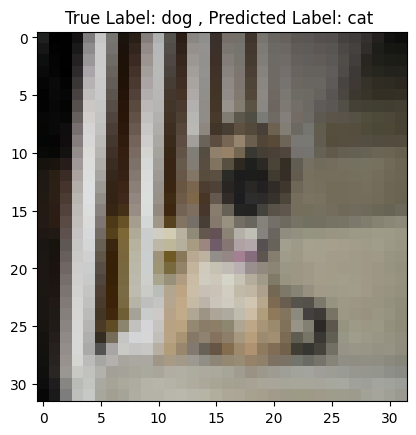

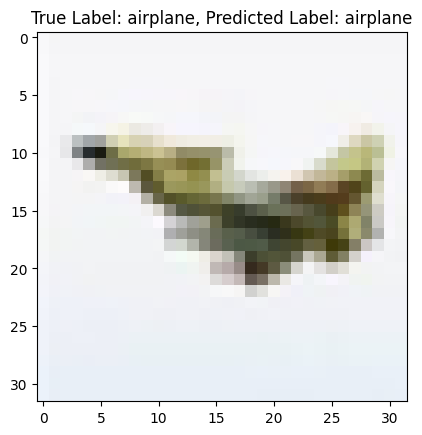

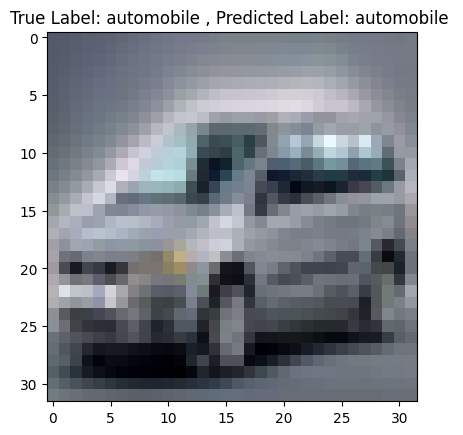

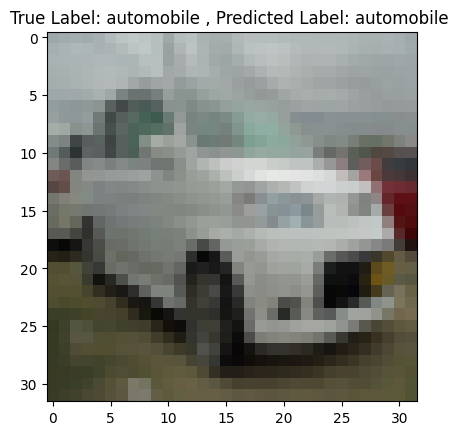

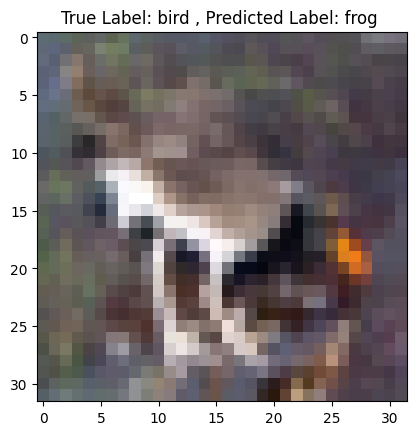

In [178]:
from sklearn.metrics import accuracy_score

predict_x=model.predict(X_test)
classes_x=np.argmax(predict_x,axis=1)

test_acc = accuracy_score(y_test, to_categorical(classes_x))
print("\n Test_acc =", test_acc)
if test_acc > 0.8:
    print("Это победа!")

import numpy as np
import matplotlib.pyplot as plt

predictions = model.predict(X_test)
random_indexes = np.random.choice(range(len(X_test)), size=5, replace=False)

# print(random_indexes)
for i in random_indexes:
    plt.imshow(X_test[i])
    plt.title(f"True Label: {class_names[np.argmax(y_test[i])]}, Predicted Label: {class_names[np.argmax(predictions[i])]}")
    plt.show()

## Вывод

1. простые нейронный сети позволили достичь уровня в районе `45` - `54` %
2. добавление `callback` значительно упрощают процесс обучения, так например можно задать большее количество эпох и не волноваться, что модель переобучиться, так как модель будет записана в файл, а так же например управлением `learningRate`
3. добавление нормализации не сильно повлияло на качество модели, без изменения ее архитектуры
4. ограничение вычислительных ресурсов очень сказывается на вариациях изменения гиперпараметров, видимо стоит иметь практический опыт, чтобы более осознанно задавать архитектуру сети
5. простые сети не позволили поднять качество выше `56` процентов
6. достижение `80`
   1. Первые четыре модели:
      + Модели имеют схожую архитектуру, начиная с входного слоя и последовательно добавляя сверточные слои, слои пулинга, слои сброса и полносвязные слои.
        Различия в каждой модели включают изменение параметров, таких как коэффициент сброса (dropout) и количество фильтров в сверточных слоях.
        Точность тестирования (`Test Accuracy`) варьируется в пределах от `0.67` до `0.69`, что может говорить о том, что эти модели не слишком эффективны.
    2. Пятая модель:
      + Эта модель имеет более глубокую архитектуру с использованием сверточных слоев и пулинга.
      + Присутствует слой сброса (dropout) и полносвязные слои.
      + Точность тестирования улучшилась до `0.75`, но все еще не достигла уровня `80`
   2. Шестая модель:
      + В этой модели добавлены дополнительные сверточные слои и уменьшено количество фильтров в последних слоях.
      + Используется оптимизатор `adam`.
      + Точность тестирования составляет `0.71`.
   3. Седьмая:
      + Эти модели имеют более сложную структуру с большим количеством сверточных и пулинговых слоев.
      + Оптимизатор `adam` и снижение `learning rate` с течением времени.
      + модель, с более глубокой архитектурой, наконец :), достигает точности тестирования более `0.8` ! но время на обучение было очень большим, а еще больше чтобы дойти до настроек параметров
   4. Восьмая модель достигает точности тестирования `0.7`.
      + Эта модель подобна Седьмой, но с изменением архитектуры, включая разные параметры слоев.

## Выводы:
   Экспериментирование с параметрами, архитектурой и оптимизаторами позволяет получить разные результаты.
   Для достижения точности тестирования более `80%`, важно тщательно настраивать параметры модели, оптимизатор и использовать подходящие методы регуляризации.
`Learning Rate Scheduler` может помочь в улучшении сходимости модели.